# IA340 Mini Project
# Leading crimes and location in Washington D.C.
# Research Question

## What are the leading crimes in Washington D.C. in 2025, and how do they vary across different neighborhoods?

- https://catalog.data.gov/dataset/crime-incidents-in-2025
- The data set includes crimes that has happened in Washington D.C. in 2025 and location by neighborhood cluster. 
- Time Period: 2025
- I choose this data set to see what are the leading crimes in D.C. that is needing the attention of the National Guard deployments and the specific areas in D.C. that they are being deployed to.

## Import

In [1]:
import pandas as pd 

crime_data = pd.read_csv( "s3://ia-340-2025-fall-hh71225/Crime_Incidents_in_2025.csv" )
crime_data.head()

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/fsspec/registry.py:298: UserWarning: Your installed version of s3fs is very old and known to cause
severe performance issues, see also https://github.com/dask/dask/issues/10276

To fix, you should specify a lower version bound on s3fs, or
update the current installation.

  warnings.warn(s3_msg)


,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,399380.5735,129543.9267,25133799,2025/09/02 09:22:41+00,MIDNIGHT,OTHERS,MOTOR VEHICLE THEFT,3800 - 3899 BLOCK OF HALLEY TERRACE SE,399380.573533,129543.926742,...,009803 3,9803.0,Precinct 124,38.833686,-77.007134,NaN,2025/09/02 06:21:00+00,2025/09/02 08:15:00+00,812847417,NaN
1,400181.7600,139596.0100,25029553,2025/03/01 17:50:30+00,DAY,OTHERS,THEFT/OTHER,600 - 622 BLOCK OF EDGEWOOD STREET NE,400181.760000,139596.010000,...,009204 2,9204.0,Precinct 74,38.924239,-76.997904,NaN,2025/03/01 09:25:00+00,2025/03/01 11:54:00+00,812847420,NaN
2,404370.0200,136293.0800,25139162,2025/09/11 22:14:00+00,EVENING,OTHERS,THEFT/OTHER,3905 - 3999 BLOCK OF MINNESOTA AVENUE NE,404370.020000,136293.080000,...,009603 3,9603.0,Precinct 102,38.894474,-76.949625,NaN,2025/09/11 21:54:00+00,2025/09/11 22:14:00+00,812847421,NaN
3,397162.0600,140182.4300,25002250,2025/01/05 14:35:13+00,DAY,OTHERS,THEFT/OTHER,3100 - 3299 BLOCK OF 14TH STREET NW,397162.060000,140182.430000,...,002802 1,2802.0,Precinct 39,38.929517,-77.032730,NaN,2025/01/05 13:45:00+00,2025/01/05 14:20:00+00,812848552,NaN
4,398437.4700,145125.2000,25141349,2025/09/15 22:57:09+00,EVENING,OTHERS,THEFT/OTHER,6900 - 6919 BLOCK OF 4TH STREET NW,398437.470000,145125.200000,...,001702 1,1702.0,Precinct 63,38.974046,-77.018032,NaN,2025/09/15 19:42:00+00,2025/09/15 20:20:00+00,812848554,NaN


## Data Cleaning

In [3]:

# 1️⃣ Drop unnecessary columns
columns_to_drop = [
    "X", "Y", "CCN", "XBLOCK", "YBLOCK", "WARD", "ANC", "PSA",
    "BLOCK_GROUP", "CENSUS_TRACT", "LATITUDE", "LONGITUDE", "BID", "OCTO_RECORD_ID"
]
crime_data = crime_data.drop(columns=columns_to_drop, errors='ignore')

# 2️⃣ Show basic info about dataset
print("🔍 Dataset Information:")
crime_data.info()

print("\n📊 Summary Statistics:")
display(crime_data.describe(include='all'))

# 3️⃣ Check for missing values
print("\n❗ Missing Values Before Cleaning:")
print(crime_data.isnull().sum())

# 4️⃣ Handle missing values
# Drop rows missing key fields (like offense type, date, or neighborhood)
essential_columns = ['Offense', 'Reported Date', 'Neighborhood']
for col in essential_columns:
    if col in crime_data.columns:
        crime_data = crime_data.dropna(subset=[col])

# 5️⃣ Convert 'Reported Date' to datetime
if 'Reported Date' in crime_data.columns:
    crime_data['Reported Date'] = pd.to_datetime(crime_data['Reported Date'], errors='coerce')

# 6️⃣ Remove duplicates
crime_data = crime_data.drop_duplicates()

# 7️⃣ Show results after cleaning
print("\n✅ After Cleaning:")
crime_data.info()

print("\nRemaining Missing Values:")
print(crime_data.isnull().sum())

# Preview cleaned data
crime_data.head()


🔍 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19376 entries, 0 to 19375
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   REPORT_DAT            19376 non-null  object 
 1   SHIFT                 19376 non-null  object 
 2   METHOD                19376 non-null  object 
 3   OFFENSE               19376 non-null  object 
 4   BLOCK                 19376 non-null  object 
 5   DISTRICT              19312 non-null  float64
 6   NEIGHBORHOOD_CLUSTER  19371 non-null  object 
 7   VOTING_PRECINCT       19371 non-null  object 
 8   START_DATE            19375 non-null  object 
 9   END_DATE              18005 non-null  object 
 10  OBJECTID              19376 non-null  int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 1.6+ MB

📊 Summary Statistics:


,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,DISTRICT,NEIGHBORHOOD_CLUSTER,VOTING_PRECINCT,START_DATE,END_DATE,OBJECTID
count,19376,19376,19376,19376,19376,19312.000000,19371,19371,19375,18005,1.937600e+04
unique,19345,3,3,9,5778,NaN,45,144,17696,16464,NaN
top,2025/02/04 05:00:00+00,DAY,OTHERS,THEFT/OTHER,3100 - 3299 BLOCK OF 14TH STREET NW,NaN,Cluster 8,Precinct 129,2025/02/28 17:00:00+00,2025/08/04 12:00:00+00,NaN
freq,4,8061,17985,9056,233,NaN,1391,806,7,6,NaN
mean,NaN,NaN,NaN,NaN,NaN,3.663836,NaN,NaN,NaN,NaN,8.132747e+08
std,NaN,NaN,NaN,NaN,NaN,1.826304,NaN,NaN,NaN,NaN,9.366135e+04
min,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,8.128474e+08
25%,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,8.131805e+08
50%,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,8.132780e+08
75%,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,8.133625e+08



❗ Missing Values Before Cleaning:
REPORT_DAT                 0
SHIFT                      0
METHOD                     0
OFFENSE                    0
BLOCK                      0
DISTRICT                  64
NEIGHBORHOOD_CLUSTER       5
VOTING_PRECINCT            5
START_DATE                 1
END_DATE                1371
OBJECTID                   0
dtype: int64

✅ After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19376 entries, 0 to 19375
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   REPORT_DAT            19376 non-null  object 
 1   SHIFT                 19376 non-null  object 
 2   METHOD                19376 non-null  object 
 3   OFFENSE               19376 non-null  object 
 4   BLOCK                 19376 non-null  object 
 5   DISTRICT              19312 non-null  float64
 6   NEIGHBORHOOD_CLUSTER  19371 non-null  object 
 7   VOTING_PRECINCT       19371 non-null  obj

,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,DISTRICT,NEIGHBORHOOD_CLUSTER,VOTING_PRECINCT,START_DATE,END_DATE,OBJECTID
0,2025/09/02 09:22:41+00,MIDNIGHT,OTHERS,MOTOR VEHICLE THEFT,3800 - 3899 BLOCK OF HALLEY TERRACE SE,7.0,Cluster 39,Precinct 124,2025/09/02 06:21:00+00,2025/09/02 08:15:00+00,812847417
1,2025/03/01 17:50:30+00,DAY,OTHERS,THEFT/OTHER,600 - 622 BLOCK OF EDGEWOOD STREET NE,5.0,Cluster 21,Precinct 74,2025/03/01 09:25:00+00,2025/03/01 11:54:00+00,812847420
2,2025/09/11 22:14:00+00,EVENING,OTHERS,THEFT/OTHER,3905 - 3999 BLOCK OF MINNESOTA AVENUE NE,6.0,Cluster 32,Precinct 102,2025/09/11 21:54:00+00,2025/09/11 22:14:00+00,812847421
3,2025/01/05 14:35:13+00,DAY,OTHERS,THEFT/OTHER,3100 - 3299 BLOCK OF 14TH STREET NW,3.0,Cluster 2,Precinct 39,2025/01/05 13:45:00+00,2025/01/05 14:20:00+00,812848552
4,2025/09/15 22:57:09+00,EVENING,OTHERS,THEFT/OTHER,6900 - 6919 BLOCK OF 4TH STREET NW,4.0,Cluster 17,Precinct 63,2025/09/15 19:42:00+00,2025/09/15 20:20:00+00,812848554


#### Explanation: I dropped the following columns "X", "Y", "CCN", "XBLOCK", "YBLOCK", "WARD", "ANC", "PSA", "BLOCK_GROUP", "CENSUS_TRACT", "LATITUDE", "LONGITUDE", "BID", "OCTO_RECORD_ID" due to it being irrelevant to the question of what the leading crimes are in D.C. and location. Reported date was changed to datetime to help with the coding portion. 

## Process/ Aggregate

In [5]:
print(crime_data.columns.tolist())


['REPORT_DAT', 'SHIFT', 'METHOD', 'OFFENSE', 'BLOCK', 'DISTRICT', 'NEIGHBORHOOD_CLUSTER', 'VOTING_PRECINCT', 'START_DATE', 'END_DATE', 'OBJECTID']


In [7]:
# ============================
# ⚙️ PROCESSING / AGGREGATION
# ============================

# 1️⃣ Create a new column for Month (from REPORT_DAT)
crime_data['Month'] = pd.to_datetime(crime_data['REPORT_DAT'], errors='coerce').dt.month_name()

# 2️⃣ Crimes by Type
crime_by_type = crime_data['OFFENSE'].value_counts().reset_index()
crime_by_type.columns = ['Offense', 'Count']

# 3️⃣ Crimes by Neighborhood Cluster
crime_by_neighborhood = crime_data['NEIGHBORHOOD_CLUSTER'].value_counts().reset_index()
crime_by_neighborhood.columns = ['Neighborhood Cluster', 'Count']

# 4️⃣ Crimes by Month
crime_by_month = (
    crime_data.groupby('Month')
    .size()
    .reset_index(name='Count')
    .sort_values(by='Count', ascending=False)
)

# 5️⃣ Display summaries
print("📊 Crimes by Type:")
display(crime_by_type.head())

print("\n🏙️ Crimes by Neighborhood Cluster:")
display(crime_by_neighborhood.head())

print("\n🗓️ Crimes by Month:")
display(crime_by_month)



📊 Crimes by Type:


,Offense,Count
0,THEFT/OTHER,9056
1,THEFT F/AUTO,4445
2,MOTOR VEHICLE THEFT,3346
3,ROBBERY,1076
4,ASSAULT W/DANGEROUS WEAPON,701



🏙️ Crimes by Neighborhood Cluster:


,Neighborhood Cluster,Count
0,Cluster 8,1391
1,Cluster 25,1350
2,Cluster 2,1208
3,Cluster 23,1004
4,Cluster 3,962



🗓️ Crimes by Month:


,Month,Count
4,July,2271
7,May,2254
1,August,2240
5,June,2202
0,April,2136
6,March,2026
3,January,1996
2,February,1934
9,September,1901
8,October,416


#### Explanation: Crimes by type helps me identify what crime is most common in D.C. in 2025. Crimes by Neighborhood cluster helps identify where specifically are these crimes taking place. Adding months was to specify and break down how many crimes were happening on a monthly basis. 

## Query

In [8]:

# 1️⃣ Filter for a specific crime type (e.g., Theft or Assault)
theft_crimes = crime_data[crime_data['OFFENSE'].str.contains('THEFT', case=False, na=False)]
print(f"🕵️ Number of Theft-related incidents: {len(theft_crimes)}")

# 2️⃣ Filter for crimes in a specific Neighborhood Cluster (example)
specific_area = "Cluster 1"
crimes_in_area = crime_data[crime_data['NEIGHBORHOOD_CLUSTER'].str.contains(specific_area, case=False, na=False)]
print(f"🏙️ Number of crimes in {specific_area}: {len(crimes_in_area)}")

# 3️⃣ Filter for crimes after July 2025
crime_data['REPORT_DAT'] = pd.to_datetime(crime_data['REPORT_DAT'], errors='coerce')
recent_crimes = crime_data[crime_data['REPORT_DAT'] >= "2025-07-01"]
print(f"📅 Crimes reported after July 2025: {len(recent_crimes)}")

# 4️⃣ Show a few rows from each filter
print("\n🔹 Theft-related Crimes:")
display(theft_crimes.head())

print("\n🔹 Crimes in Selected Neighborhood Cluster:")
display(crimes_in_area.head())

print("\n🔹 Crimes Reported After July 2025:")
display(recent_crimes.head())


🕵️ Number of Theft-related incidents: 16847
🏙️ Number of crimes in Cluster 1: 3877
📅 Crimes reported after July 2025: 6828

🔹 Theft-related Crimes:


,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,DISTRICT,NEIGHBORHOOD_CLUSTER,VOTING_PRECINCT,START_DATE,END_DATE,OBJECTID,Month
0,2025/09/02 09:22:41+00,MIDNIGHT,OTHERS,MOTOR VEHICLE THEFT,3800 - 3899 BLOCK OF HALLEY TERRACE SE,7.0,Cluster 39,Precinct 124,2025/09/02 06:21:00+00,2025/09/02 08:15:00+00,812847417,September
1,2025/03/01 17:50:30+00,DAY,OTHERS,THEFT/OTHER,600 - 622 BLOCK OF EDGEWOOD STREET NE,5.0,Cluster 21,Precinct 74,2025/03/01 09:25:00+00,2025/03/01 11:54:00+00,812847420,March
2,2025/09/11 22:14:00+00,EVENING,OTHERS,THEFT/OTHER,3905 - 3999 BLOCK OF MINNESOTA AVENUE NE,6.0,Cluster 32,Precinct 102,2025/09/11 21:54:00+00,2025/09/11 22:14:00+00,812847421,September
3,2025/01/05 14:35:13+00,DAY,OTHERS,THEFT/OTHER,3100 - 3299 BLOCK OF 14TH STREET NW,3.0,Cluster 2,Precinct 39,2025/01/05 13:45:00+00,2025/01/05 14:20:00+00,812848552,January
4,2025/09/15 22:57:09+00,EVENING,OTHERS,THEFT/OTHER,6900 - 6919 BLOCK OF 4TH STREET NW,4.0,Cluster 17,Precinct 63,2025/09/15 19:42:00+00,2025/09/15 20:20:00+00,812848554,September



🔹 Crimes in Selected Neighborhood Cluster:


,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,DISTRICT,NEIGHBORHOOD_CLUSTER,VOTING_PRECINCT,START_DATE,END_DATE,OBJECTID,Month
4,2025/09/15 22:57:09+00,EVENING,OTHERS,THEFT/OTHER,6900 - 6919 BLOCK OF 4TH STREET NW,4.0,Cluster 17,Precinct 63,2025/09/15 19:42:00+00,2025/09/15 20:20:00+00,812848554,September
9,2025/03/22 01:07:54+00,EVENING,OTHERS,MOTOR VEHICLE THEFT,310 - 399 BLOCK OF RIGGS ROAD NE,4.0,Cluster 19,Precinct 65,2025/03/21 19:45:00+00,2025/03/21 20:59:00+00,813131453,March
12,2025/07/25 19:10:21+00,EVENING,OTHERS,THEFT/OTHER,100 - 199 BLOCK OF CARROLL STREET NW,4.0,Cluster 17,Precinct 63,2025/07/25 17:47:00+00,2025/07/25 17:50:00+00,813131500,July
15,2025/02/22 21:35:21+00,EVENING,OTHERS,THEFT F/AUTO,3700 - 3799 BLOCK OF NORTHAMPTON STREET NW,2.0,Cluster 10,Precinct 50,2025/02/22 21:17:00+00,2025/02/22 21:35:00+00,813132568,February
25,2025/03/09 00:21:58+00,EVENING,OTHERS,THEFT/OTHER,4500 - 4537 BLOCK OF WISCONSIN AVENUE NW,2.0,Cluster 11,Precinct 31,2025/03/08 21:26:00+00,2025/03/08 23:06:00+00,813132578,March



🔹 Crimes Reported After July 2025:


,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,DISTRICT,NEIGHBORHOOD_CLUSTER,VOTING_PRECINCT,START_DATE,END_DATE,OBJECTID,Month
0,2025-09-02 09:22:41+00:00,MIDNIGHT,OTHERS,MOTOR VEHICLE THEFT,3800 - 3899 BLOCK OF HALLEY TERRACE SE,7.0,Cluster 39,Precinct 124,2025/09/02 06:21:00+00,2025/09/02 08:15:00+00,812847417,September
2,2025-09-11 22:14:00+00:00,EVENING,OTHERS,THEFT/OTHER,3905 - 3999 BLOCK OF MINNESOTA AVENUE NE,6.0,Cluster 32,Precinct 102,2025/09/11 21:54:00+00,2025/09/11 22:14:00+00,812847421,September
4,2025-09-15 22:57:09+00:00,EVENING,OTHERS,THEFT/OTHER,6900 - 6919 BLOCK OF 4TH STREET NW,4.0,Cluster 17,Precinct 63,2025/09/15 19:42:00+00,2025/09/15 20:20:00+00,812848554,September
5,2025-08-31 13:43:51+00:00,DAY,OTHERS,THEFT/OTHER,1300 - 1399 BLOCK OF U STREET NW,3.0,Cluster 3,Precinct 22,2025/08/31 13:04:00+00,NaN,812848555,August
12,2025-07-25 19:10:21+00:00,EVENING,OTHERS,THEFT/OTHER,100 - 199 BLOCK OF CARROLL STREET NW,4.0,Cluster 17,Precinct 63,2025/07/25 17:47:00+00,2025/07/25 17:50:00+00,813131500,July


#### Explanation: I used filters to explore specific parts of the data set related to crime type, location, and time. This will help identify the leading crimes and location in D.C.. 

## Visualization

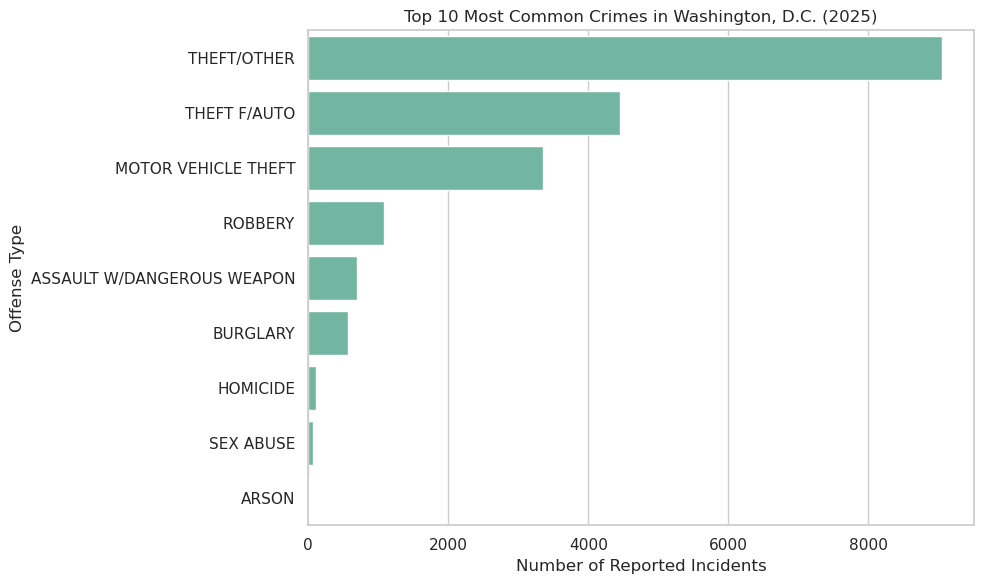

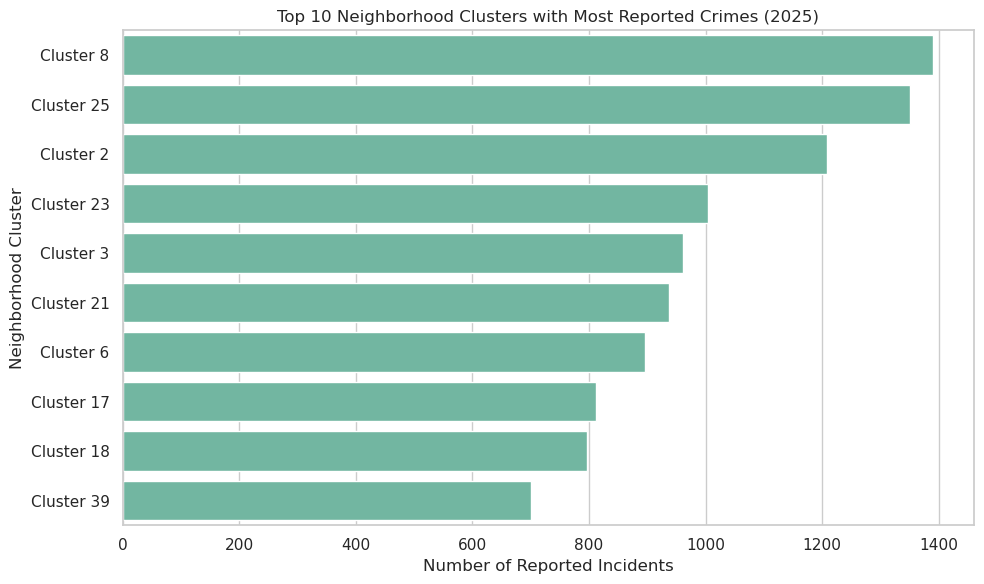

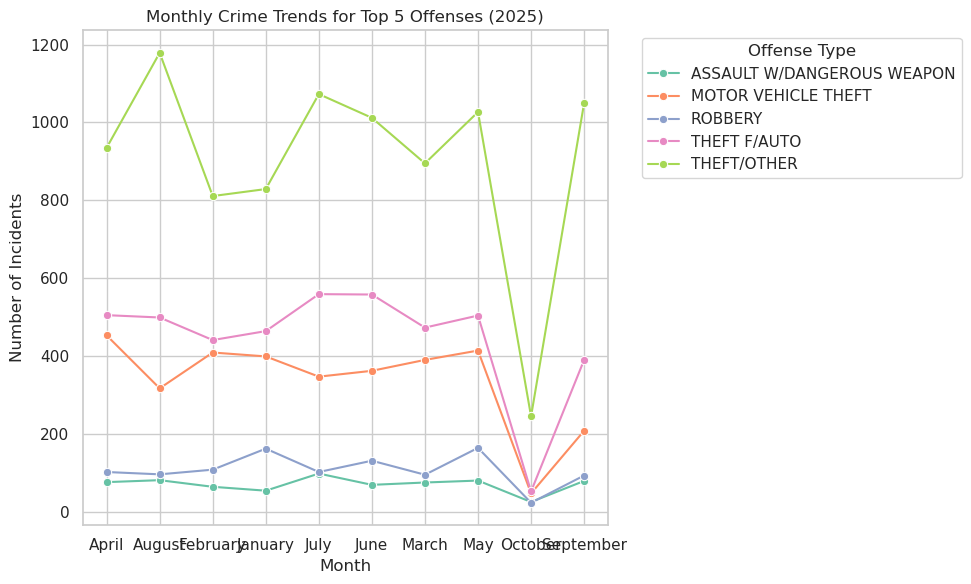

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="Set2")

# 1️⃣ Top 10 Most Common Offenses
plt.figure(figsize=(10,6))
top10_offenses = crime_by_type.head(10)

sns.barplot(x='Count', y='Offense', data=top10_offenses)
plt.title("Top 10 Most Common Crimes in Washington, D.C. (2025)")
plt.xlabel("Number of Reported Incidents")
plt.ylabel("Offense Type")
plt.tight_layout()
plt.show()

# 2️⃣ Top 10 Neighborhood Clusters with Most Crimes
plt.figure(figsize=(10,6))
top10_neighborhoods = crime_by_neighborhood.head(10)

sns.barplot(x='Count', y='Neighborhood Cluster', data=top10_neighborhoods)
plt.title("Top 10 Neighborhood Clusters with Most Reported Crimes (2025)")
plt.xlabel("Number of Reported Incidents")
plt.ylabel("Neighborhood Cluster")
plt.tight_layout()
plt.show()

# 3️⃣ Optional: Monthly Crime Trends for Top Offenses
plt.figure(figsize=(10,6))
top_offenses = crime_data['OFFENSE'].value_counts().head(5).index
monthly_trends = (
    crime_data[crime_data['OFFENSE'].isin(top_offenses)]
    .groupby(['Month','OFFENSE'])
    .size()
    .reset_index(name='Count')
)

sns.lineplot(data=monthly_trends, x='Month', y='Count', hue='OFFENSE', marker="o")
plt.title("Monthly Crime Trends for Top 5 Offenses (2025)")
plt.xlabel("Month")
plt.ylabel("Number of Incidents")
plt.legend(title="Offense Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### Explanation: Graph 1 shows that the most common crime in Washington D.C. is theft including any type of theft excluding auto. Auto theft is the second leading crime in D.C.. 


#### Graph 2: This graph shows what neighborhood clusters have the most crime happening in. Cluster 8 is the most common area, the area is the south eastern quadrant of D.C. including Anacostia, Washington Highlands, and Bellevue. 

#### Graph 3: This graph shows what months certain crimes are most common. This graphs goes one step further to show what are the "peak or drop" of these common crimes. There could be a underlying answer as in to why certain crimes like theft is most common in August. 